<a href="https://colab.research.google.com/github/paliwalpiyush151/Molecular_Simulations/blob/main/Copy_of_MiniProject_2_Ising_Model_Piyush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mini Project-2 :  2D Ising Model**
## **Name: Piyush Paliwal**
## **Roll No. 17180**

In [ ]:
def pali(z):
  a = 0
  for i in range(len(z)):
    if z[i]==z[len(z)-i-1]:
        a=a+1
    print(a)
  if a==(len(z)):
    print("Palindrom")

In [ ]:
pali('madam')

1
2
3
4
5
Palindrom


##User defined function to initialize the state and make Monte Carlo move

In [ ]:
# Importing libraries 
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import seaborn as sns
import random 

''' Generating random spin on grid of size N x N'''
def initialize_state(N):
  # Generate random 2D array of size N x N with each lattice having either -1 or 1 
  np.random.seed(round(N/2))
  state = 2*np.random.randint(2,size = (N,N))-1
  return state

''' Montecarlo move : Metropolis algorithm for generate markov's chain: '''

def MC_move(config,beta,N,h,eqsteps):
  ''' No of equilibrium steps needed to reach from initial random state to ground state '''
  for i in range(eqsteps):
    ''' Randomly choose lattice point [i,j] to generate chain of random samples'''
    '''Chosse the random lattice from grid'''
    p = np.random.randint(0,N)
    q = np.random.randint(0,N)
    '''Now flip the chosen spin '''
    r = config[p,q]
    # summing up nighbouring spins and applying boundary conditions
    ''' Boundary conditions for spins and adding up interactions '''
    neigh_spins = config[(p+1)%N,q] + config[(p-1)%N,q] + config[p,(q+1)%N] + config[p,(q-1)%N]
    energy_change = 2*r*neigh_spins + 2*h*r  # addition of 2*h*r term
    '''if energy change is negative then accept the spin'''
    count = 0
    if (energy_change < 0):
      r *=-1
      count = count+1
    '''if positive energy change then we use random trail to accept the move'''
    if (count==0):
      if (rand() < np.exp(-energy_change*beta)):
        r *=-1
    config[p,q] = r

  return config

# function to find avgerage moment of lattice spin states
def avg_moment(lattice,N):
  count = 0
  for i in range(N):
    for j in range(N):
      count = count + lattice[i][j]
  return count/(N*N)
  
def avg_momentSq(lattice,N):
  count = 0
  for i in range(N):
    for j in range(N):
      count = count + (lattice[i][j])**2
  return count/(N*N)

### (A)  Ground state configuration in absence of the field at T=0 or very large $\beta$ =  $\frac{1}{T}$.
## In ground state configuration, all spins are alligned in same direction either all up or all down. So in that case average magnetic moment = 1.0 unit. It can be less than 1.0 if ground state is not acienved yet but the algorithm we are using follows detailed balance and it guarantees to converge to a ground state with all spins up or down 

Initial random state  with N = 25 is :
 


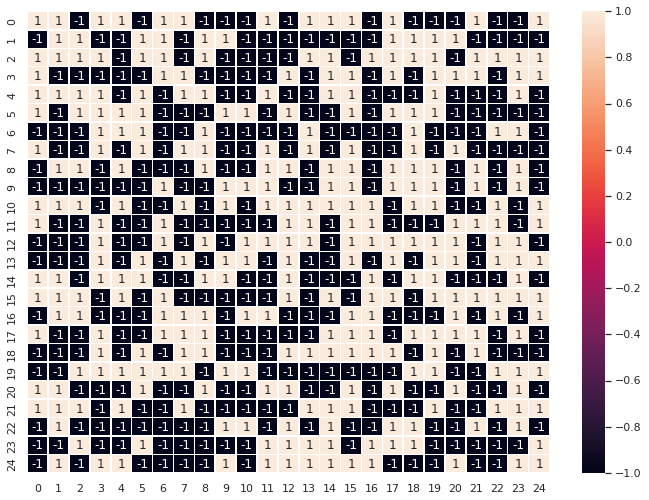

In [ ]:
import pandas as pd
import random
h=0
N_1,N_2 = 25,50   #  For N = 25
T,beta = 0, 10000             # T = 0 k implies beta is very large  
random.seed(10)
lattice_o = initialize_state(N_1)
lattice_t = initialize_state(N_2)   # Initial random configuration
print('Initial random state  with N = 25 is :\n ')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(lattice_o, annot=True, fmt="d",linewidth=0.5)

## Initial random state at N = 50

Initial random state  with N = 50 is :
 


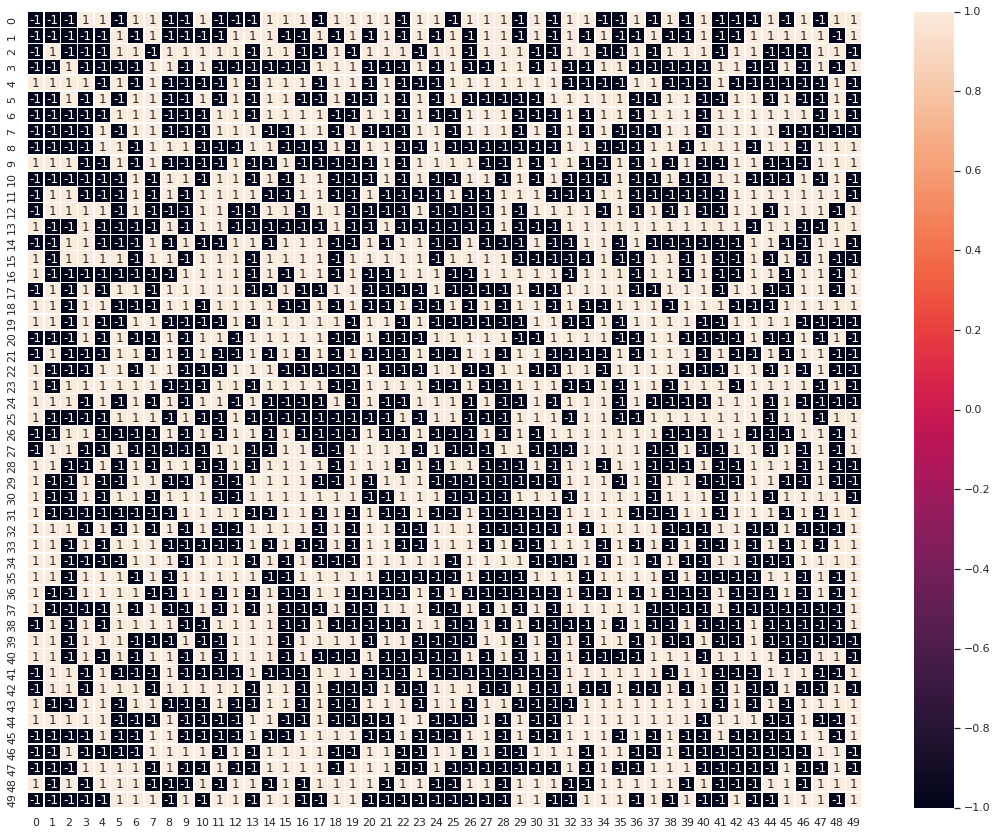

In [ ]:
print('Initial random state  with N = 50 is :\n ')
sns.set(rc={'figure.figsize':(18.7,14.27)})
sns.heatmap(lattice_t, annot=True, fmt="d",linewidth=0.5)

final ground state configuration with system N = 25 is 



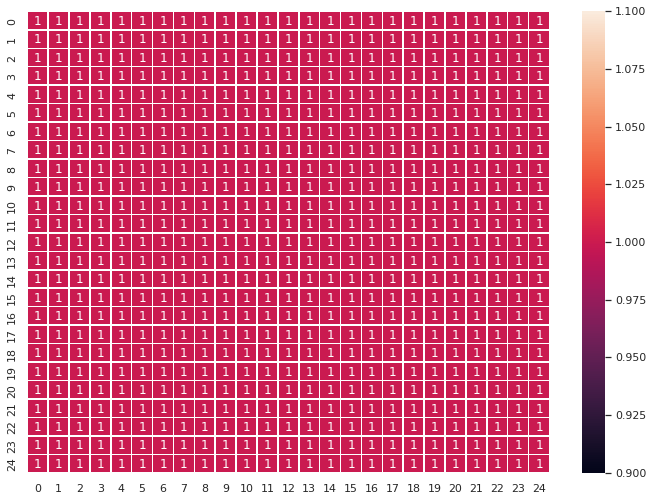

In [ ]:
p_1 =  MC_move(lattice_o,beta,N_1,h,90000)
print('final ground state configuration with system N = 25 is \n')
#print(DataFrame(p))
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(p_1, annot=True, fmt="d",linewidth=0.5) 

## Answer(A) :  Please note that ground state configuration should theoretically have all spins paired up in same direction. Sometimes it ends up with generation of lattice having two different type of regions with all spins up in one region of lattice and all spins down in one region of lattice. In that case more number of equilibriation step are needed to reach equilibrium. But Whole point of discussion is ground state is ordered spins state with all spins up or all spins down or sometime generating two regions of different spins. 

## In my simulations, I have generated lot of random spin lattices and found that some initial random state lesser number of equilibriation steps are needed and sometime more steps are needed.

## However, one observation is common: $ORDER \;IN \;THE \;SYSTEM$

final ground state configuration with system N = 50 is 



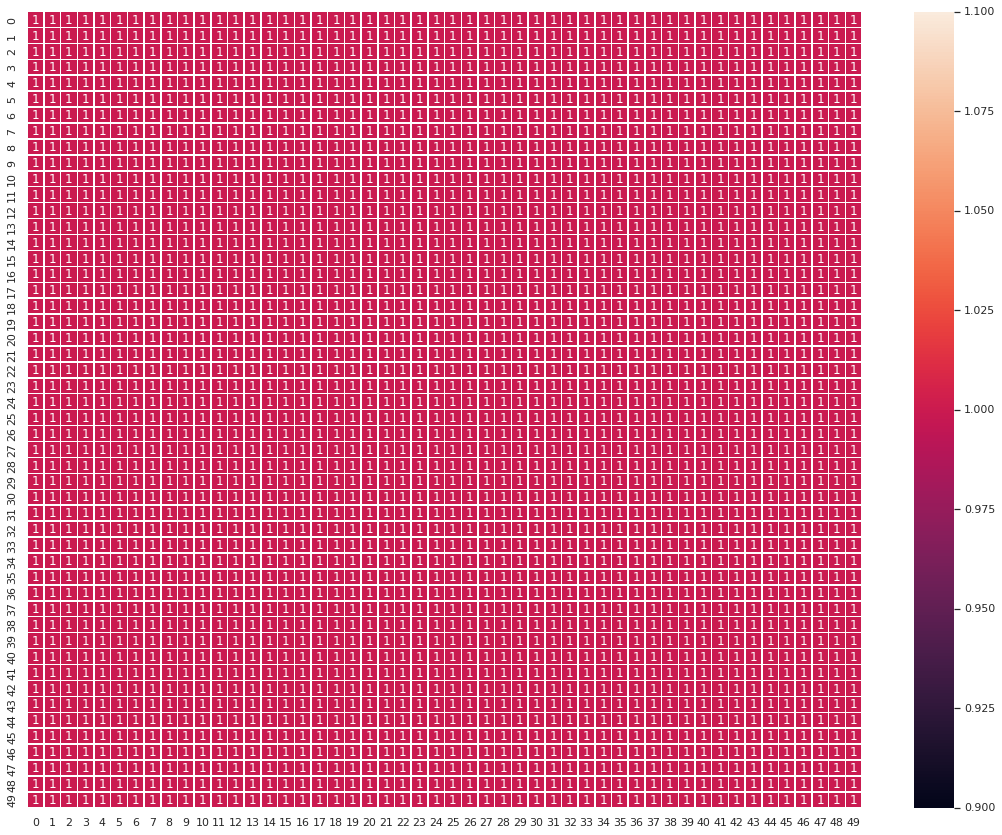

In [ ]:
p_2 =  MC_move(lattice_t,beta,N_2,h,2000000) 
print('final ground state configuration with system N = 50 is \n')
sns.set(rc={'figure.figsize':(18.7,14.27)})
ax = sns.heatmap(p_2, annot=True, fmt="d",linewidth=0.5)

### (B) Average magnetic moment per lattice site in above ground state: 

In [ ]:
Avg_Moment = avg_moment(p_1,N_1)
print('Avg moment of ground state configuration  with N = 25 ',abs(Avg_Moment))
Avg_Moment = avg_moment(p_2,N_2)
print('Avg moment of ground state configuration  with N = 50 ',abs(Avg_Moment))

Avg moment of ground state configuration  with N = 25  1.0
Avg moment of ground state configuration  with N = 50  1.0


### (C) Ferro-Paramagnetic Transition temeperature ($T_c$) in absence of external field or h = 0:   
### Here, I have checked the range of temperature where transition is going on and selected that range for simulations.

In [ ]:
h = 0
n_1,n_2 = 40,60   # no of points 
steps=[700,2400]
Temp_1 = np.linspace(1.0,3.5 ,n_1);    # temperature points at different intervals
Temp_2 = np.linspace(0.6,3.5,n_2)
mc_steps = [256,512]   # no of monte carlo steps to reach ground state from initial random state
N = [25,50]
Avg_Mo = [list(),list()]
KAI_Mo = [list(),list()]

for i in range(n_1):
  beta = 1/Temp_1[i]
  start = initialize_state(N[0])
  for j in range(mc_steps[0]): 
    final = MC_move(start,beta,N[0],h,steps[0])
  a_m = abs(avg_moment(final,N[0]))
  Avg_Mo[0].append(a_m)
  k_m = (avg_momentSq(final,N[0]) - avg_moment(final,N[0])**2)*beta
  KAI_Mo[0].append(k_m)

for i in range(n_2):
  beta = 1/Temp_2[i]
  start = initialize_state(N[1])
  for j in range(mc_steps[1]): 
    final = MC_move(start,beta,N[1],h,steps[1])
  a_m = abs(avg_moment(final,N[1]))
  Avg_Mo[1].append(a_m)
  k_m = (avg_momentSq(final,N[1]) - avg_moment(final,N[1])**2)*beta
  KAI_Mo[1].append(k_m)

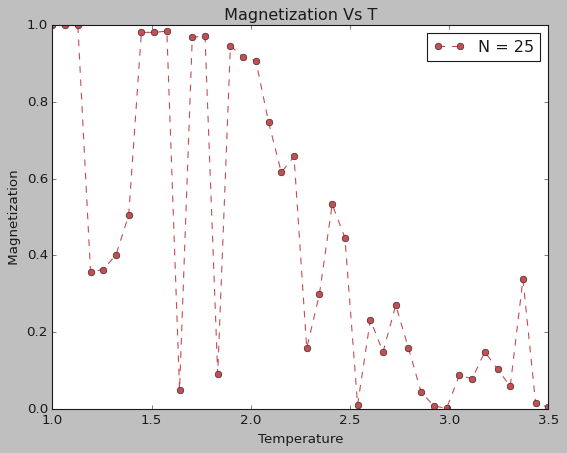

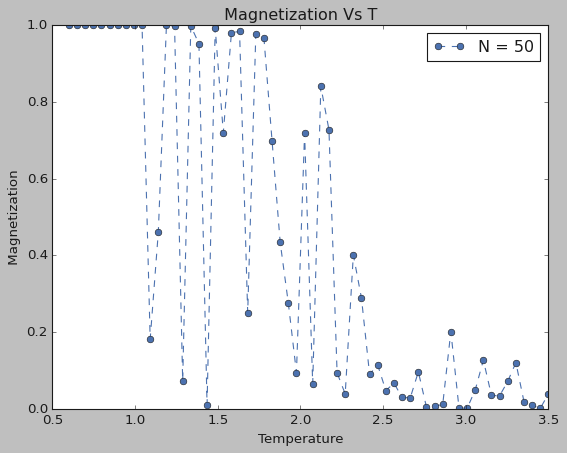

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.plot(Temp_1, Avg_Mo[0], 'ro--')
plt.legend(['N = 25'])
plt.xlabel("Temperature")
plt.ylabel(" Magnetization ")
plt.title(" Magnetization Vs T ")
plt.show()

plt.style.use('classic')
plt.plot(Temp_2, Avg_Mo[1], 'bo--')
plt.legend(['N = 50'])
plt.xlabel("Temperature")
plt.ylabel(" Magnetization ")
plt.title(" Magnetization Vs T ")
plt.show()


## Hence,   $T_c$ = 2.3 unit approximately for N =25 (may vary little on each simulation). For the case of N = 50, $T_c = 2.0 \;unit$ . Transition temperature of both the cases lies in range of 1.5 to 2.5 unit. Transition temepreature reduces significantly on increasing the number of lattice spin sites. 

### (D) Ferro-Paramagnetic Temperature from $\chi(m) $  Vs T : 
### $\chi(m) =\frac{<M^2>- <M>^2}{T}$

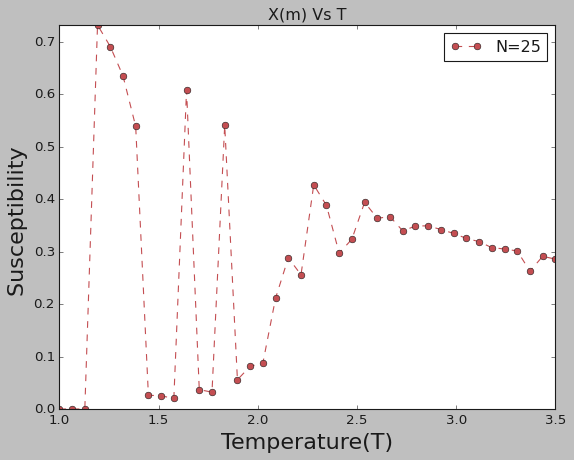

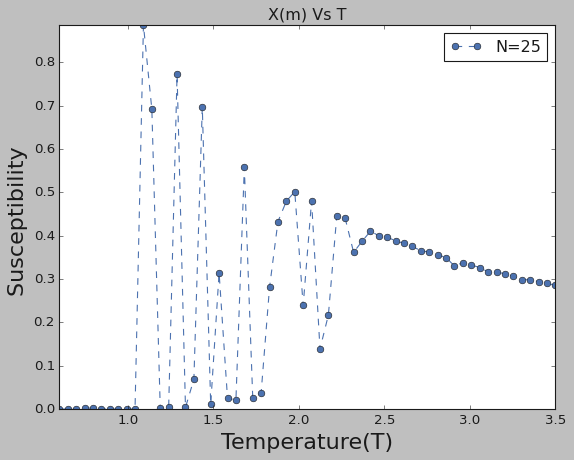

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.plot(Temp_1, KAI_Mo[0], 'ro--')
plt.legend(['N=25','N=50'])
plt.xlabel("Temperature(T)",fontsize=20)
plt.ylabel("Susceptibility ",fontsize = 20)
plt.title("X(m) Vs T")
plt.axis('tight')
plt.show()
print('\n\n')
plt.plot(Temp_2, KAI_Mo[1], 'bo--')
plt.legend(['N=25','N=50'])
plt.xlabel("Temperature(T)",fontsize=20)
plt.ylabel("Susceptibility ",fontsize = 20)
plt.title("X(m) Vs T")
plt.axis('tight')
plt.show()

## from $\chi(m) \;Vs \;T $     plot    $T_c$ = 2.3 unit approximately for N = 25 (may vary little on each simulation)
## For N = 50, $\;T_c = 1.75\;unit$ (Lies between 1.5 to 2.0 from the plot)

##(E)  **Correlation function :** $<\sigma_i\sigma_i+_n>$

## From Part (C) and (D) we  obtained $T_c$ values for both N = 25 and N = 50. 
## $T_c(N=25) =  2.3 \;unit \;(approx)$ 
## $T_c(N=50) =  1.75 \;unit\;(approx)$ 

In [ ]:
h=0
TrTc = [0.1,0.7,1.1]
Tc1 = 2.3
Tc2 = 1.75
T_1 = [0.23,1.61,2.53]         # T_1 = TrTc * Tc 
T_2 = [0.175,1.225,1.925]
N = [25,50]
steps=[800,2400]
mc_steps = [256,512]

n_1 = [list(),list()]
g_1 = [list(),list(),list()]

for i in range(len(N)):
  for k in range(1,round(N[i]/2)+1):
    n_1[i].append(k)

for p in range(len(T_1)):
  beta = 1/T_1[p]
  start = initialize_state(N[0])
  for j in range(mc_steps[0]): 
    final = MC_move(start,beta,N[0],h,steps[0])

  for k in range(len(n_1[0])):
    lat_1 = 0
    for i in range(N[0]-n_1[0][k]):
      for j in range(N[0]-n_1[0][k]):
        lat_1 +=  final[i][j]*final[i][(j+n_1[0][k])] 
    g_1[p].append(lat_1/(N[0]*N[0]))

In [ ]:
g_2 = [list(),list(),list()]
for p in range(len(T_2)):
  beta = 1/T_2[p]
  start = initialize_state(N[1])
  for j in range(mc_steps[1]): 
    final = MC_move(start,beta,N[1],h,steps[1])
    
  for k in range(len(n_1[1])):
    lat_1 = 0
    for i in range(N[1]-n_1[1][k]):
      for j in range(N[1]-n_1[1][k]):
        lat_1 +=  final[i][j]*final[i][(j+n_1[1][k])] 
    #print(lat_1/(N*N))
    g_2[p].append(lat_1/(N[1]*N[1]))

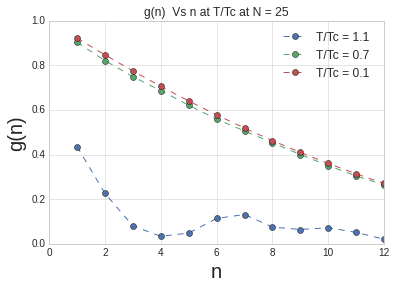

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(n_1[0],g_1[2],'bo--')
plt.plot(n_1[0],g_1[1],'go--')
plt.plot(n_1[0],g_1[0],'ro--')
plt.legend(["T/Tc = 1.1 ","T/Tc = 0.7","T/Tc = 0.1"])
plt.xlabel("n",fontsize=20)
plt.ylabel("g(n)",fontsize=20)
plt.title("g(n)  Vs n at T/Tc at N = 25")
plt.show()

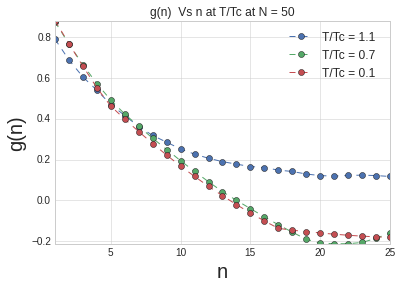

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(n_1[1],g_2[2],'bo--')
plt.plot(n_1[1],g_2[1],'go--')
plt.plot(n_1[1],g_2[0],'ro--')
plt.legend(["T/Tc = 1.1 ","T/Tc = 0.7","T/Tc = 0.1"])
plt.xlabel("n",fontsize=20)
plt.ylabel("g(n)",fontsize=20)
plt.title("g(n)  Vs n at T/Tc at N = 50")
plt.axis('tight')
plt.show()

###(F) $\;\;T_c\; as\; a\; function \;of\; h = 0,\;0.01,\;0.1,\;0.5 $

##Case 1:   **h = 0**

In [ ]:
h = [0,0.01,0.1,0.5]
n_1,n_2 = 40,40   # no of points 
steps=[700,2400]
Temp_1 = np.linspace(1.0,4 ,n_1);    # temperature points at different intervals
Temp_2 = np.linspace(0.6,4,n_2)
mc_steps = [256,512]   # no of monte carlo steps to reach ground state from initial random state
N = [25,50]
Avg_Mo = [[list(),list(),list(),list()],[list(),list(),list(),list()]]
KAI_Mo = [[list(),list(),list(),list()],[list(),list(),list(),list()]]


for i in range(n_1):
  beta = 1/Temp_1[i]
  start = initialize_state(N[0])
  for j in range(mc_steps[0]): 
    final = MC_move(start,beta,N[0],h[0],steps[0])
  a_m = abs(avg_moment(final,N[0]))
  Avg_Mo[0][0].append(a_m)
  k_m = (avg_momentSq(final,N[0]) - avg_moment(final,N[0])**2)*beta
  KAI_Mo[0][0].append(k_m)

for i in range(n_2):
  beta = 1/Temp_2[i]
  start = initialize_state(N[1])
  for j in range(mc_steps[1]): 
    final = MC_move(start,beta,N[1],h[0],steps[1])
  a_m = abs(avg_moment(final,N[1]))
  Avg_Mo[1][0].append(a_m)
  k_m = (avg_momentSq(final,N[1]) - avg_moment(final,N[1])**2)*beta
  KAI_Mo[1][0].append(k_m)

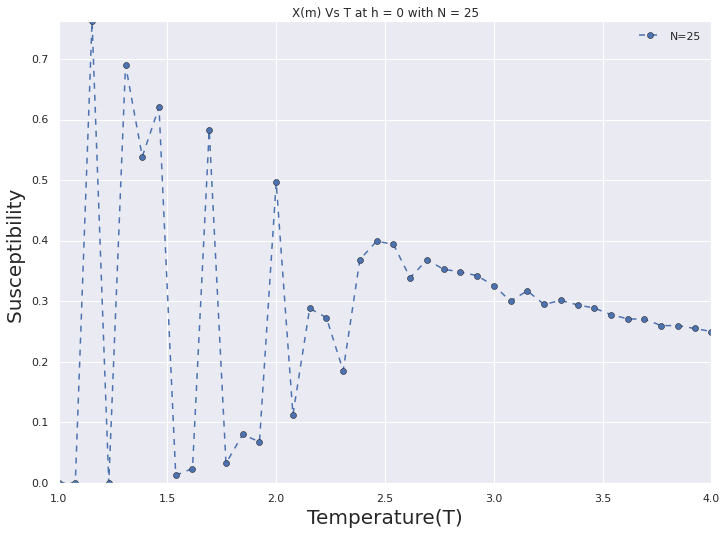

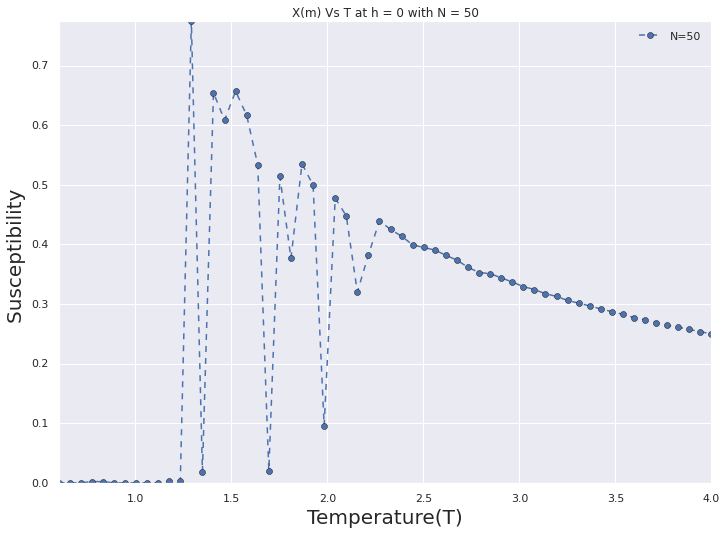

In [ ]:
plt.plot(Temp_1, KAI_Mo[0][0], 'bo--')
plt.legend(['N=25'])
plt.xlabel("Temperature(T)",fontsize=20)
plt.ylabel("Susceptibility ",fontsize = 20)
plt.title("X(m) Vs T at h = 0 with N = 25")
plt.axis('tight')
plt.show()
print('\n\n')
plt.plot(Temp_2, KAI_Mo[1][0], 'bo--')
plt.legend(['N=50'])
plt.xlabel("Temperature(T)",fontsize=20)
plt.ylabel("Susceptibility ",fontsize = 20)
plt.title("X(m) Vs T at h = 0 with N = 50")
plt.axis('tight')
plt.show()

### **Case 2 : h = 0.01**

In [ ]:
Avg_Mo = [[list(),list(),list(),list()],[list(),list(),list(),list()]]
KAI_Mo = [[list(),list(),list(),list()],[list(),list(),list(),list()]]

for i in range(n_1):
  beta = 1/Temp_1[i]
  start = initialize_state(N[0])
  for j in range(mc_steps[0]): 
    final = MC_move(start,beta,N[0],h[1],steps[0])
  a_m = abs(avg_moment(final,N[0]))
  Avg_Mo[0][1].append(a_m)
  k_m = (avg_momentSq(final,N[0]) - avg_moment(final,N[0])**2)*beta
  KAI_Mo[0][1].append(k_m)

for i in range(n_2):
  beta = 1/Temp_2[i]
  start = initialize_state(N[1])
  for j in range(mc_steps[1]): 
    final = MC_move(start,beta,N[1],h[1],steps[1])
  a_m = abs(avg_moment(final,N[1]))
  Avg_Mo[1][1].append(a_m)
  k_m = (avg_momentSq(final,N[1]) - avg_moment(final,N[1])**2)*beta
  KAI_Mo[1][1].append(k_m)

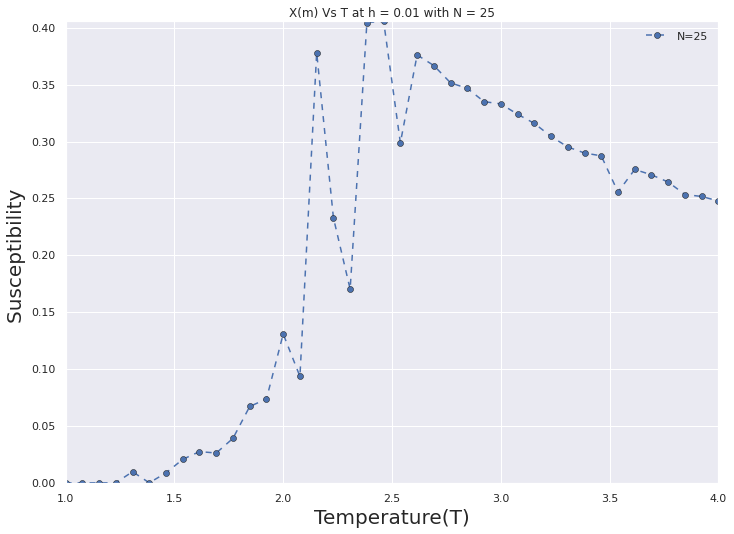

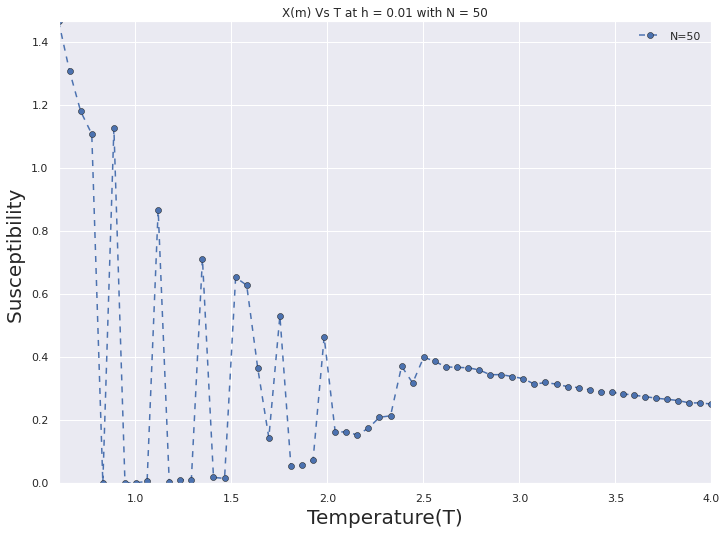

In [ ]:
plt.plot(Temp_1, KAI_Mo[0][1], 'bo--')
plt.legend(['N=25'])
plt.xlabel("Temperature(T)",fontsize=20)
plt.ylabel("Susceptibility ",fontsize = 20)
plt.title("X(m) Vs T at h = 0.01 with N = 25")
plt.axis('tight')
plt.show()
print('\n\n')
plt.plot(Temp_2, KAI_Mo[1][1], 'bo--')
plt.legend(['N=50'])
plt.xlabel("Temperature(T)",fontsize=20)
plt.ylabel("Susceptibility ",fontsize = 20)
plt.title("X(m) Vs T at h = 0.01 with N = 50")
plt.axis('tight')
plt.show()

## **Case 3: h = 0.1**

In [ ]:
Avg_Mo = [[list(),list(),list(),list()],[list(),list(),list(),list()]]
KAI_Mo = [[list(),list(),list(),list()],[list(),list(),list(),list()]]

for i in range(n_1):
  beta = 1/Temp_1[i]
  start = initialize_state(N[0])
  for j in range(mc_steps[0]): 
    final = MC_move(start,beta,N[0],h[2],steps[0])
  a_m = abs(avg_moment(final,N[0]))
  Avg_Mo[0][2].append(a_m)
  k_m = (avg_momentSq(final,N[0]) - avg_moment(final,N[0])**2)*beta
  KAI_Mo[0][2].append(k_m)

for i in range(n_2):
  beta = 1/Temp_2[i]
  start = initialize_state(N[1])
  for j in range(mc_steps[1]): 
    final = MC_move(start,beta,N[1],h[2],steps[1])
  a_m = abs(avg_moment(final,N[1]))
  Avg_Mo[1][2].append(a_m)
  k_m = (avg_momentSq(final,N[1]) - avg_moment(final,N[1])**2)*beta
  KAI_Mo[1][2].append(k_m)

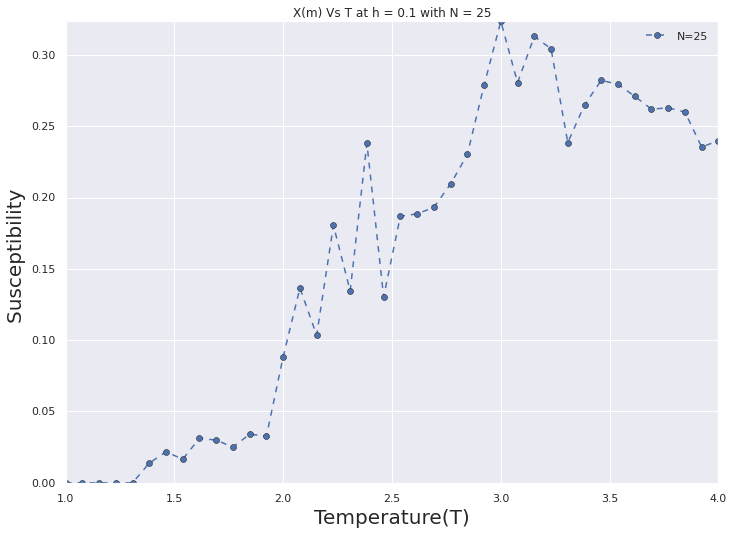

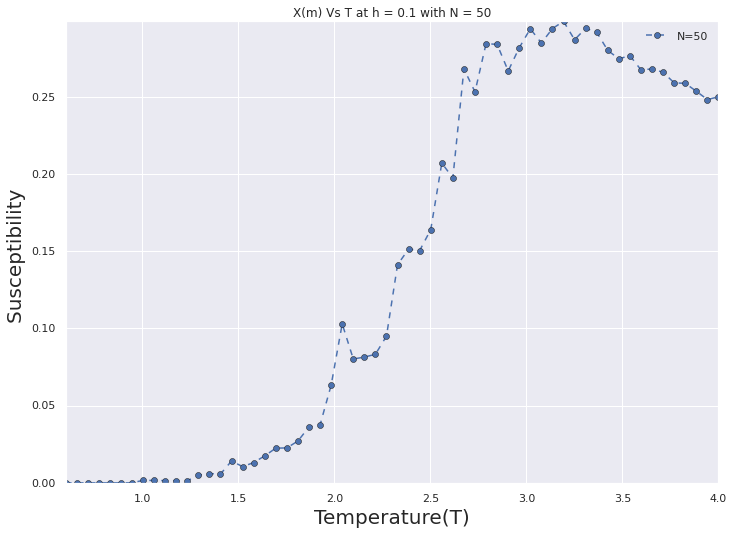

In [ ]:
plt.plot(Temp_1, KAI_Mo[0][2], 'bo--')
plt.legend(['N=25'])
plt.xlabel("Temperature(T)",fontsize=20)
plt.ylabel("Susceptibility ",fontsize = 20)
plt.title("X(m) Vs T at h = 0.1 with N = 25")
plt.axis('tight')
plt.show()
print('\n\n')
plt.plot(Temp_2, KAI_Mo[1][2], 'bo--')
plt.legend(['N=50'])
plt.xlabel("Temperature(T)",fontsize=20)
plt.ylabel("Susceptibility ",fontsize = 20)
plt.title("X(m) Vs T at h = 0.1 with N = 50")
plt.axis('tight')
plt.show()

In [ ]:
Avg_Mo = [[list(),list(),list(),list()],[list(),list(),list(),list()]]
KAI_Mo = [[list(),list(),list(),list()],[list(),list(),list(),list()]]

for i in range(n_1):
  beta = 1/Temp_1[i]
  start = initialize_state(N[0])
  for j in range(mc_steps[0]): 
    final = MC_move(start,beta,N[0],h[3],steps[0])
  a_m = abs(avg_moment(final,N[0]))
  Avg_Mo[0][3].append(a_m)
  k_m = (avg_momentSq(final,N[0]) - avg_moment(final,N[0])**2)*beta
  KAI_Mo[0][3].append(k_m)

for i in range(n_2):
  beta = 1/Temp_2[i]
  start = initialize_state(N[1])
  for j in range(mc_steps[1]): 
    final = MC_move(start,beta,N[1],h[3],steps[1])
  a_m = abs(avg_moment(final,N[1]))
  Avg_Mo[1][3].append(a_m)
  k_m = (avg_momentSq(final,N[1]) - avg_moment(final,N[1])**2)*beta
  KAI_Mo[1][3].append(k_m)

In [ ]:
plt.plot(Temp_1, KAI_Mo[0][3], 'bo--')
plt.legend(['N=25'])
plt.xlabel("Temperature(T)",fontsize=20)
plt.ylabel("Susceptibility ",fontsize = 20)
plt.title("X(m) Vs T at h = 0.1 with N = 25")
plt.axis('tight')
plt.show()
print('\n\n')
plt.plot(Temp_2, KAI_Mo[1][3], 'bo--')
plt.legend(['N=50'])
plt.xlabel("Temperature(T)",fontsize=20)
plt.ylabel("Susceptibility ",fontsize = 20)
plt.title("X(m) Vs T at h = 0.1 with N = 50")
plt.axis('tight')
plt.show()

### **Understanding from Project:**
###2D ising model explains theoretically explains phenomena of phase transition from one Ferromagnetic to paramagnetic state & predicts the critical temeprature of transition. 
### This project start with generation of random spin state and by appyling Metropolis and Montecarlo algorithm we attain configuration with all spins up or all spins down. 
### For spin system with N x N = 25 x 25, critical temepratuture obained is ni range of 2 to 3 (or 2.3 unit) while for ystem with N x N = 50 x 50 same temperature range decreases to 1.5 to 2.5 (or 1.75 unit by analysing Magnetization Vs Temperature  and $\chi(m)$ Vs Temeperature plot when external field is not applied.
### On applying Magnetic field, We observe the rise in critical temperature in both the systems. 
### Correlation fuction plot tells that spins that are nearest, are strongly correlated and this correlation decreases with increase in correlation length. 

###Region where we observe sudden change correcponds to critical or phases transition region. We observe that as size of spin system increases, $T_c$ of that system goes down computational cost increases as system becomes larger.  